In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =15,9
rcParams['font.size'] = 15.0
from matplotlib import font_manager as fm
from sklearn.metrics import accuracy_score, mean_squared_error as mse
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') 

In [3]:
df['TotalCharges'].replace(" ",np.nan,inplace=True)

In [4]:
df.dropna(inplace=True)

In [5]:
df.drop(columns={'customerID'},axis=1,inplace=True)

In [6]:
df['TotalCharges']=df['TotalCharges'].astype('float')

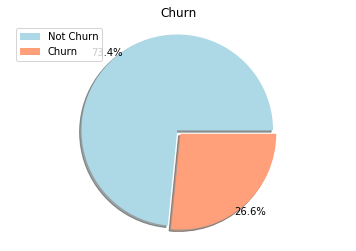

In [7]:
performance = [df[df['Churn'] == 'No']['Churn'].count(),\
               df[df['Churn'] == 'Yes']['Churn'].count()]

colors_list = ['#ADD8E6', '#FFA07A']
explode_list = [0.05, 0] 


plt.pie([float(v) for v in performance],autopct='%1.1f%%',pctdistance=1.09,
         colors=colors_list,shadow=True,explode=explode_list)


plt.title('Churn', y=1.0) 


plt.legend(labels=['Not Churn','Churn'], loc='upper left') 
plt.axis('equal') 
plt.show()

In [8]:
df['Churn']=df.Churn.apply(lambda x: 1 if x=='Yes' else 0)

In [9]:
df1 = pd.get_dummies(data = df,columns = ['gender',              
'Partner',             
'Dependents',          
'PhoneService',        
'MultipleLines',       
'InternetService',     
'OnlineSecurity',     
'OnlineBackup',        
'DeviceProtection',    
'TechSupport',         
'StreamingTV',         
'StreamingMovies',     
'Contract',            
'PaperlessBilling',
'PaymentMethod'],dtype=np.int32 )

In [10]:
df1['churn']= df1['Churn']
df1.drop(columns={'Churn'},inplace=True)

In [11]:
df1.drop(columns={'TotalCharges'},inplace=True)

In [12]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
array = df1.values
X = array[:,0:44]
Y = array[:,44]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(X, Y)
print(df1.columns.tolist())
print(fit.n_features_.tolist())
print(fit.support_)
print(fit.ranking_)
df9=pd.DataFrame(df1.columns.tolist())
df9[1]=pd.DataFrame(fit.support_.tolist())
df9.head(30)

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarn

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarn

,0,1
0,SeniorCitizen,False
1,tenure,False
2,MonthlyCharges,False
3,gender_Female,False
4,gender_Male,False
5,Partner_No,False
6,Partner_Yes,True
7,Dependents_No,False
8,Dependents_Yes,False
9,PhoneService_No,False


In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
array = df1.values
X = array[:,0:44]
Y = array[:,44]
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:7,:])

scores, pvalues = chi2(X, Y)
print(pvalues < 0.05 )
df9[2]=pd.DataFrame(pvalues < 0.05)

[1.335e+02 1.638e+04 3.653e+03 2.591e-01 2.543e-01 7.632e+01 8.186e+01
 5.586e+01 1.313e+02 8.682e-01 9.295e-02 3.889e+00 8.682e-01 6.515e+00
 7.114e+01 3.721e+02 2.855e+02 4.140e+02 2.855e+02 1.472e+02 2.825e+02
 2.855e+02 3.121e+01 2.502e+02 2.855e+02 2.022e+01 4.040e+02 2.855e+02
 1.354e+02 6.966e+01 2.855e+02 1.732e+01 7.286e+01 2.855e+02 1.593e+01
 5.167e+02 1.766e+02 4.862e+02 1.528e+02 1.050e+02 7.662e+01 9.997e+01
 4.241e+02 4.473e+01]
[[ 1.   29.85  0.    1.    1.    0.    0.    1.    0.    1.  ]
 [34.   56.95  0.    0.    1.    0.    0.    0.    0.    0.  ]
 [ 2.   53.85  0.    0.    1.    0.    0.    1.    0.    0.  ]
 [45.   42.3   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 2.   70.7   1.    1.    1.    0.    0.    1.    0.    1.  ]
 [ 8.   99.65  1.    1.    1.    0.    0.    1.    0.    1.  ]
 [22.   89.1   1.    1.    1.    0.    0.    1.    0.    0.  ]]
[ True  True  True False False  True  True  True  True False False  True
 False  True  True  True  True  True 

In [14]:
df9.loc[(df9[2]==True)]

,0,1,2
0,SeniorCitizen,False,True
1,tenure,False,True
2,MonthlyCharges,False,True
5,Partner_No,False,True
6,Partner_Yes,True,True
7,Dependents_No,False,True
8,Dependents_Yes,False,True
11,MultipleLines_No,False,True
13,MultipleLines_Yes,False,True
14,InternetService_DSL,True,True


In [15]:
from sklearn.model_selection import train_test_split

new_data=df1.iloc[:,0:44][(df9.loc[(df9[2]==True)][0])]
x = (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values


X_train, X_test, y_train, y_test = train_test_split(x,
                                                    df1.iloc[:,44], test_size=0.3,random_state=42)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.63      0.50      0.56       561

   micro avg       0.79      0.79      0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

[[1387  162]
 [ 283  278]]
0.7803165961361744


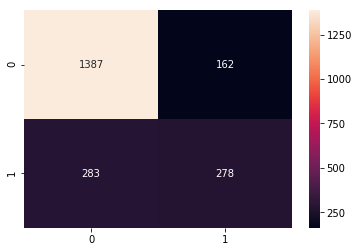

In [16]:
clf = svm.SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
# print("SVM Regression scores is..:" + str(svm.score(X_test,y_test)))
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, fmt="d")
plt.show

from sklearn.metrics import f1_score
print(f1_score(y_test, yhat, average='weighted')) 

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}
 
# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
 
# Train the classifier
clf_grid.fit(X_train, y_train)
 
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  1.0min finished


Best Parameters:
 {'C': 10, 'gamma': 0.01}
Best Estimators:
 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


The shape of the training set after the SMOTE oversampling = (7228, 39)


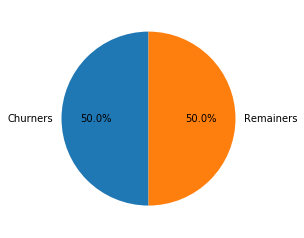

In [18]:
# Apply the SMOTE oversampling to the training data
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='auto', kind='regular')
X_train, y_train = sm.fit_sample(X_train, y_train)
print('The shape of the training set after the SMOTE oversampling = ' + str(X_train.shape))
fig1, ax1 = plt.subplots()
ax1.pie([y_train[y_train==1].size, y_train[y_train==0].size], labels=['Churners', 'Remainers'],
        autopct='%1.1f%%', startangle=90)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}
 
# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
 
# Train the classifier
clf_grid.fit(X_train, y_train)
 
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  2.5min finished


Best Parameters:
 {'C': 100, 'gamma': 1}
Best Estimators:
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1549
           1       0.53      0.49      0.51       561

   micro avg       0.75      0.75      0.75      2110
   macro avg       0.67      0.67      0.67      2110
weighted avg       0.74      0.75      0.74      2110

[[1302  247]
 [ 285  276]]
0.7449755881698966


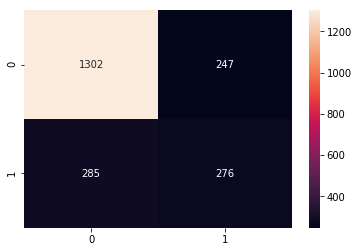

In [20]:
clf = svm.SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
# print("SVM Regression scores is..:" + str(svm.score(X_test,y_test)))
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, fmt="d")
plt.show

from sklearn.metrics import f1_score
print(f1_score(y_test, yhat, average='weighted')) 